In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.optimize import LinearConstraint


In [63]:
csv_location='/Users/mattocallaghan/XPNorm/Data/data_full'
data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values
data_transform=np.array([
                                    [1., 0., 0., 0., 0., 0.,0],
                                    [0., 1., 0., -0., -1., 0.,0],
                                    [0., 0., 1., 0., 0., 0.,-1],
                                    [0., 0., 0., 1., 0., 0.,-1],
                                    [-1., 0., 0., 0., 1., 0.,0],
                                    [-1., 0., 0., 0., 0., 1.,0],
                                    [-1., 0., 0., 0., 0., 0.,1]])

chosen_point_index=50000
g = np.array([0.7, 0.95])
bp =  np.array([0.97, 1.28])
rp =  np.array([0.55, 0.69])
j =  np.array([0.71, 0.73])/3.1
h =  np.array([0.45, 0.47])/3.1
ks =  np.array([0.34, 0.36])/3.1

extinction_vector=torch.tensor(np.einsum('ij,j->i',data_transform,
                np.array([0,g.mean(), bp.mean(), rp.mean(), j.mean(), h.mean(), ks.mean()])))
       

data=np.einsum('ij,bj->bi',np.array(data_transform),np.array(data))
error=np.array([0.07,0.00308123, 0.01036897, 0.0043106 , 0.03507253, 0.03733693,
       0.05396977])**2
error=np.sqrt(np.einsum('ij,bj->bi',np.abs(np.array(data_transform)),error[None,:]))

chosen_point = data[chosen_point_index]

sigma=np.sqrt(error[0,1:].sum())
# Function to calculate distance between a point and the line
def distance_from_line(point, extinction_vector, chosen_point):
    # Convert point and direction_vector to numpy arrays if they are not already
    point = np.array(point)
    extinction_vector = np.array(extinction_vector)
    chosen_point = np.array(chosen_point)
    
    # Calculate the vector from the chosen point to the given point
    vec_to_point = (point[1:] - chosen_point[1:])
    
    # Calculate the projection of vec_to_point onto the extinction vector
    projection = np.dot(vec_to_point/error[0,1:], extinction_vector[1:]/error[0,1:]) / (0.000001+np.linalg.norm((1/error[0,1:])*extinction_vector[1:])*np.linalg.norm((1/error[0,1:])*vec_to_point))
    
    # Calculate the distance between the point and the line
    distance = np.linalg.norm(vec_to_point)*np.sin(np.arccos(projection))
    
    return np.arccos(projection)

# Calculate distances of all points from the line
distances = [distance_from_line(point, extinction_vector, chosen_point) for point in data[:len(data)]]

# Count points within sigma distance from the line
count = np.sum(np.abs(np.array(distances)) <= sigma*3)
print(count)
d_nomag=np.array(distances)


print(np.abs((np.degrees(d_nomag)-90)).mean())
print(np.abs((np.degrees(d_nomag)-90)).std())


226417
41.56816628541741
18.33978745690134


43.24766485653816
17.317808395355758

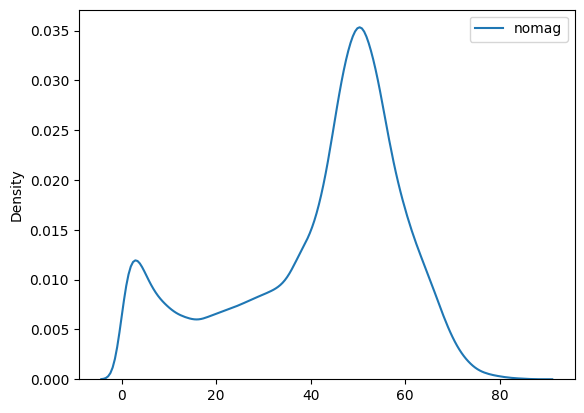

In [64]:

sn.kdeplot(np.abs(np.degrees(d_nomag)-90),label='nomag')
plt.legend()

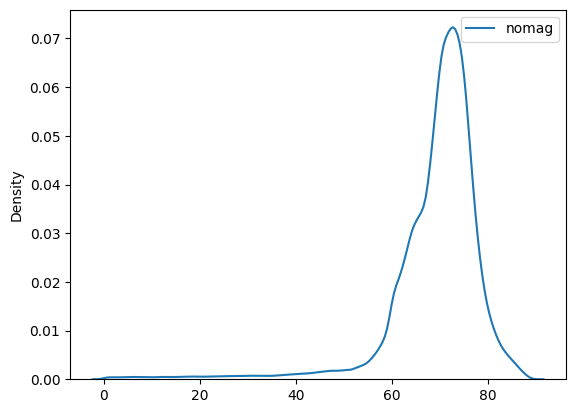

In [15]:

sn.kdeplot(np.abs(np.degrees(d_nomag)-90),label='nomag')
plt.legend()

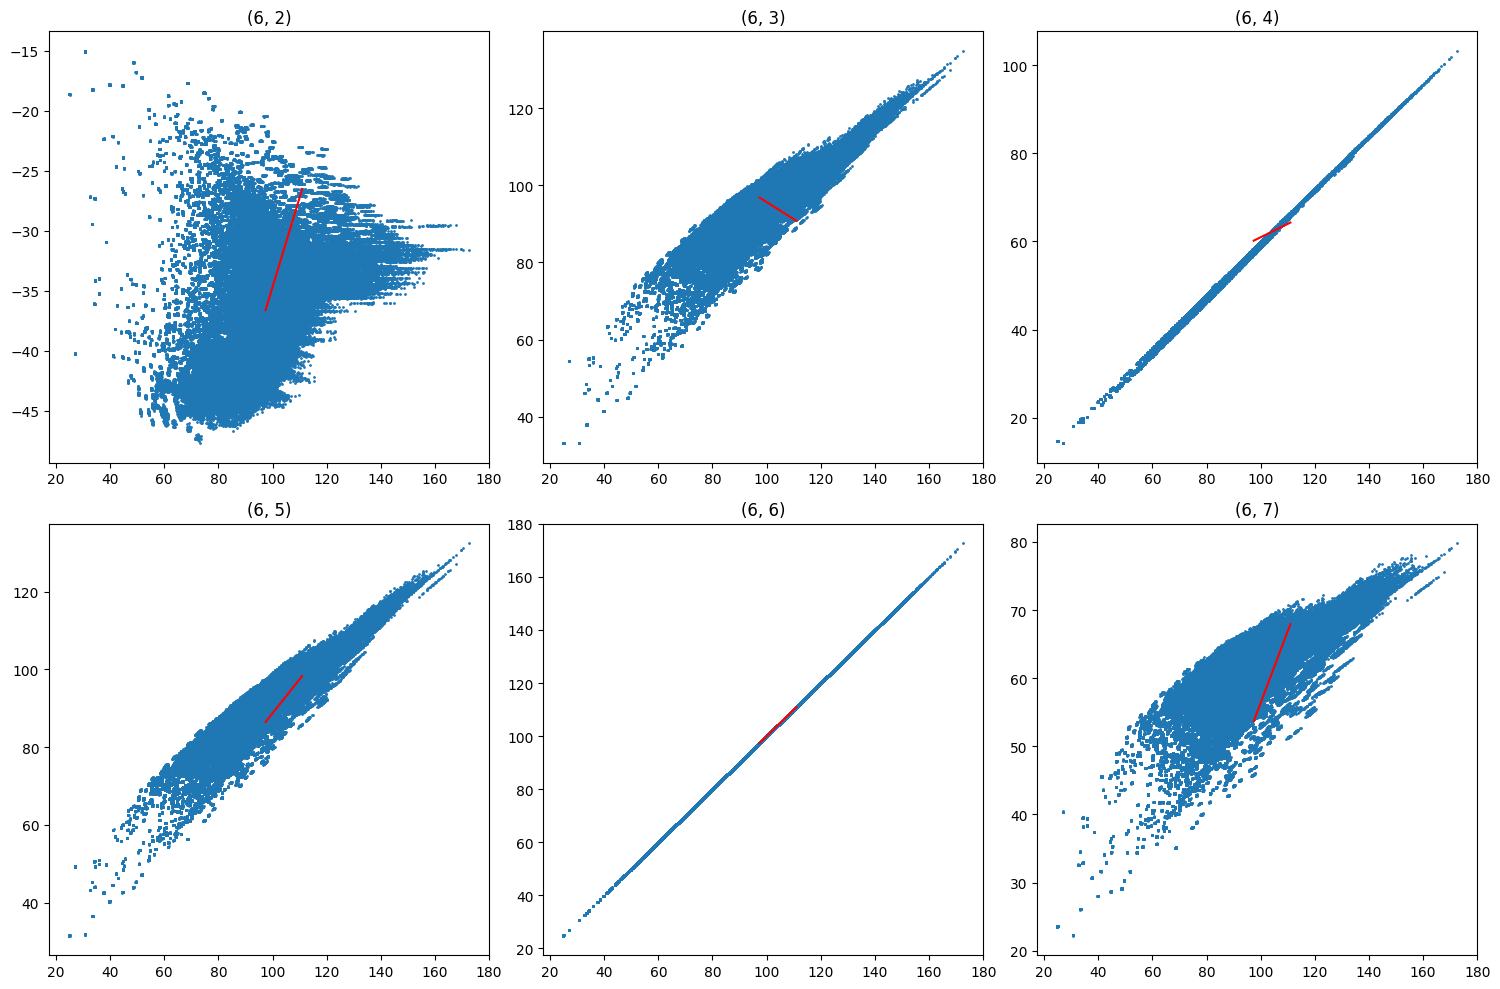

In [235]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (assuming you have this already)


# Define a function to calculate the position vector of any point on the line
def line_equation(x0, y0, direction_vector, t):
    return np.array([x0, y0]) + t * direction_vector.numpy()

# Generate values for the parameter t
t_values = np.linspace(-10, 10, 100)  # Adjust the range as needed

# Create subplots grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axs if it's not already flat
axs = axs.flatten()
idx=5
# Loop through each pair (i, j) for subplots
for idx, (i, j) in enumerate([(idx, 1), (idx, 2), (idx, 3), (idx, 4), (idx, 5), (idx, 6)]):
    # Choose a point from your data (you can adjust this according to your requirement)
    chosen_point_index = 500  # You can choose any index based on your data
    x0 = data[chosen_point_index, i]
    y0 = data[chosen_point_index, j]

    # Given vector representing the direction of the line
    direction_vector = extinction_vector[[i, j]]

    # Calculate corresponding position vectors for the line using the equation
    line_points = np.array([line_equation(x0, y0, direction_vector, t) for t in t_values])

    # Plot the scatter plot
    axs[idx].scatter(data[:, i], data[:, j], s=1)

    # Plot the line using the calculated points
    axs[idx].plot(line_points[:, 0], line_points[:, 1], color='red', label='Vector equation of the line')

    # Set titles for subplots
    axs[idx].set_title(f'({i+1}, {j+1})')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
import seaborn as sn